In [1]:
import os
from pathlib import Path

csvpath = os.getenv("CSVPATH")      # input csv
outputsvg = os.getenv("OUTPUTSVG")  # output graph as pdf
ylimtime = os.getenv("YLIMTIME")    # specifiing y limit of time (hours)
ylimcost = os.getenv("YLIMCOST")    # specifiing y limit of cost (USD)

# set args here if CSVPATH is not given through Environment variable
if csvpath is None:
    csvpath = "/fsx/20240206_CSS_GTC__EMPIAR-10673_Run06/cc_result_20240206_CSS_GTC__EMPIAR-10673_Run06_edit.csv"
    ylimtime = "6"
    ylimcost = "60"

assert csvpath is not None, "input csvpath is None"
if outputsvg is None:
    outputsvg = Path(csvpath).with_suffix('.svg')
ylimtime = None if ylimtime is None else int(ylimtime)
ylimcost = None if ylimcost is None else int(ylimcost)

In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv(csvpath)
df

,JobType/JobID,Job Name,GPUs,MPI,Thread,MPIs/Node,Nodes,Process time(hh:mm:ss),Process time(hours),Running time(hh:mm:ss),Running time(hours),Time diff(minutes),EC2 Instance Name,EC2 Instance Type,Cores/node,Cost/hours(USD),"Cost(ProcessTime,USD)","Cost(RunnningTime,USD)"
0,Import/job001/,importmovies,NaN,NaN,NaN,NaN,NaN,0:00:02,0.001,0:00:02,0.001,0.0,NaN,NaN,NaN,NaN,0.000,0.000
1,MotionCorr/job002/,motioncorr,NaN,48.0,8.0,24.0,2.0,4:05:23,4.090,1:41:32.541000,1.692,143.8,m7i-vcpu192-gpu0,m7i.48xlarge,192.0,9.6768,79.151,32.754
2,Select/job003/,select_motioncor_mics,NaN,NaN,NaN,NaN,NaN,0:00:00,0.000,0:00:00,0.000,0.0,NaN,NaN,NaN,NaN,0.000,0.000
3,CtfFind/job004/,ctffind,NaN,48.0,NaN,24.0,2.0,0:34:13,0.570,0:34:13.079000,0.570,-0.0,m7i-vcpu192-gpu0,m7i.48xlarge,192.0,9.6768,11.037,11.037
4,Select/job005/,0101_Select_mic,NaN,NaN,NaN,NaN,NaN,0:00:00,0.000,0:00:00,0.000,0.0,NaN,NaN,NaN,NaN,0.000,0.000
5,Select/job006/,0102_Select_split_stack_mics,NaN,NaN,NaN,NaN,NaN,0:00:00,0.000,0:00:00,0.000,0.0,NaN,NaN,NaN,NaN,0.000,0.000
6,External/job007/,0200_Extenal_cryolo,8.0,NaN,1.0,1.0,1.0,0:40:06,0.668,0:40:06,0.668,0.0,g5-vcpu192-gpu8,g5.48xlarge,192.0,16.2880,10.886,10.886
7,Extract/job008/,0300_Extract,NaN,192.0,NaN,192.0,1.0,0:51:09,0.853,0:13:45.583000,0.229,37.4,c7i-vcpu192-gpu0,c7i.48xlarge,192.0,8.5680,7.304,1.965
8,Select/job009/,0301_Select_rm_bars_x,NaN,NaN,NaN,NaN,NaN,0:00:31,0.009,0:00:31,0.009,0.0,NaN,NaN,NaN,NaN,0.000,0.000
9,Select/job010/,0302_Select_rm_bars_xy,NaN,NaN,NaN,NaN,NaN,0:00:29,0.008,0:00:29,0.008,0.0,NaN,NaN,NaN,NaN,0.000,0.000


In [3]:
from adjustText import *

def intersect(seg1, seg2):
    x1, y1, x2, y2 = seg1
    x3, y3, x4, y4 = seg2
    denom = (y4 - y3) * (x2 - x1) - (x4 - x3) * (y2 - y1)
    if denom == 0:  # parallel
        return False
    ua = ((x4 - x3) * (y1 - y3) - (y4 - y3) * (x1 - x3)) / denom
    if ua < 0 or ua > 1:  # out of range
        return False
    ub = ((x2 - x1) * (y1 - y3) - (y2 - y1) * (x1 - x3)) / denom
    if ub < 0 or ub > 1:  # out of range
        return False
    return True


def get_bboxes_ignoring_arrow_patch(objs, r=None, expand=(1, 1), ax=None):
    """


    Parameters
    ----------
    objs : list, or PathCollection
        List of objects to get bboxes from. Also works with mpl PathCollection.
    r : renderer
        Renderer. The default is None, then automatically deduced from ax.
    expand : (float, float), optional
        How much to expand bboxes in (x, y), in fractions. The default is (1, 1).
    ax : Axes, optional
        The default is None, then uses current axes.

    Returns
    -------
    list
        List of bboxes.

    """
    ax = ax or plt.gca()
    r = r or get_renderer(ax.get_figure())
    try:
        objs = [i.get_bbox() for i in objs]
    except (AttributeError, TypeError):
        pass

    try:
        return [i.get_window_extent_ignoring_arrow_patch(r).expanded(*expand) for i in objs]
    except (AttributeError, TypeError):
        try:
            if all([isinstance(obj, matplotlib.transforms.BboxBase) for obj in objs]):
                return objs
            else:
                raise ValueError("Something is wrong")
        except TypeError:
            return get_bboxes_pathcollection(objs, ax)


def get_2d_coordinates_ignoring_arrow_patch(objs, ax):
    bboxes = get_bboxes_ignoring_arrow_patch(objs, get_renderer(ax.get_figure()), (1.0, 1.0), ax)
    xs = [
        (ax.convert_xunits(bbox.xmin), ax.convert_yunits(bbox.xmax)) for bbox in bboxes
    ]
    ys = [
        (ax.convert_xunits(bbox.ymin), ax.convert_yunits(bbox.ymax)) for bbox in bboxes
    ]
    coords = np.hstack([np.array(xs), np.array(ys)])
    return coords

def adjust_text_ignoring_arrow_patch(
    texts,
    x=None,
    y=None,
    objects=None,
    target_x=None,
    target_y=None,
    avoid_self=True,
    prevent_crossings=True,
    force_text: tuple[float, float] | float = (0.1, 0.2),
    force_static: tuple[float, float] | float = (0.1, 0.2),
    force_pull: tuple[float, float] | float = (0.01, 0.01),
    force_explode: tuple[float, float] | float = (0.1, 0.5),
    pull_threshold: float = 10,
    expand: tuple[float, float] = (1.05, 1.2),
    max_move: tuple[int, int] | int | None = (5, 5),
    explode_radius: str | float = "auto",
    ensure_inside_axes: bool = True,
    expand_axes: bool = False,
    only_move: dict = {"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
    ax: matplotlib.axes.Axes | None = None,
    min_arrow_len: float = 5,
    time_lim: float | None = None,
    iter_lim: int | None = None,
    *args,
    **kwargs,
):
    """Iteratively adjusts the locations of texts.

    Call adjust_text the very last, after all plotting (especially
    anything that can change the axes limits) has been done. This is
    because to move texts the function needs to use the dimensions of
    the axes, and without knowing the final size of the plots the
    results will be completely nonsensical, or suboptimal.

    First "explodes" all texts to move them apart.
    Then in each iteration pushes all texts away from each other, and any specified
    points or objects. At the same time slowly tries to pull the texts closer to their
    origianal locations that they label (this reduces chances that a text ends up super
    far away). In the end adds arrows connecting the texts to the respective points.

    Parameters
    ----------
    texts : list
        A list of :obj:`matplotlib.text.Text` objects to adjust.

    Other Parameters
    ----------------
    x : array_like
        x-coordinates of points to repel from; with avoid_self=True, the original
        text coordinates will be added to this array
    y : array_like
        y-coordinates of points to repel from; with avoid_self=True, the original
        text coordinates will be added to this array
    objects : list or PathCollection
        a list of additional matplotlib objects to avoid; they must have a
        `.get_window_extent()` method; alternatively, a PathCollection or a
        list of Bbox objects.
    target_x : array_like
        if provided, x-coordinates of points to connect adjusted texts to; if not
        provided, uses the original text coordinates.
        Provide together with target_y.
        Should be the same length as texts and in the same order, or None.
    target_y : array_like
        if provided, y-coordinates of points to connect adjusted texts to; if not
        provided, uses the original text coordinates.
        Provide together with target_x.
        Should be the same length as texts and in the same order, or None.
    avoid_self : bool, default True
        whether to repel texts from its original positions.
    prevent_crossings : bool, default True
        whether to prevent arrows from crossing each other [NEW, EXPERIMENTAL]
    force_text : tuple[float, float] | float, default (0.1, 0.2)
        the repel force from texts is multiplied by this value
    force_static : tuple[float, float] | float, default (0.1, 0.2)
        the repel force from points and objects is multiplied by this value
    force_pull : tuple[float, float] | float, default (0.01, 0.01)
        same as other forces, but for pulling texts back to original positions
    force_explode : tuple[float, float] | float, default (0.1, 0.5)
        same as other forces, but for the forced move of texts away from nearby texts
        and static positions before iterative adjustment
    pull_threshold : float, default 10
        how close to the original position the text should be pulled (if it's closer
        along one of the axes, don't pull along it) - in display coordinates
    expand : array_like, default (1.05, 1.2)
        a tuple/list/... with 2 multipliers (x, y) by which to expand the
        bounding box of texts when repelling them from each other.
    max_move : tuple[int, int] | int | None, default (20, 20)
        the maximum distance a text can be moved in one iteration in display units
        (in x and y directions); if a single integer or float is provided, it will be used for
        both x and y
    explode_radius : float or "auto", default "auto"
        how far to check for nearest objects to move the texts away in the beginning
        in display units, so on the order of 100 is the typical value.
        "auto" uses the mean size of the texts
    ensure_inside_axes : bool, default True
        Whether to force texts to stay inside the axes
    expand_axes : bool, default False
        Whether to expand the axes to fit all texts before adjusting there positions
    only_move : dict, default {"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"}
        a dict to restrict movement of texts to only certain axes for certain
        types of overlaps.
        Valid keys are 'text', 'static', 'explode' and 'pull'.
        'explode' is the initial explosion of texts to avoid overlaps, and this value is
        also used for random shifts of perfectly overlapping texts to ensure they don't
        stay in the same place.
        Can contain 'x', 'y', 'x+', 'x-', 'y+', 'y-', or combinations of one 'x?' and
        one 'y?'. 'x' and 'y' mean that the text can move in that direction, 'x+' and
        'x-' mean that the text can move in the positive or negative direction along
        the x axis, and similarly for 'y+' and 'y-'.
    ax : matplotlib axes, default is current axes (plt.gca())
        ax object with the plot
    min_arrow_len : float, default 5
        If the text is closer than this to the target point, don't add an arrow
        (in display units)
    time_lim : float, default None
        How much time to allow for the adjustments, in seconds.
        If both `time_lim` and iter_lim are set, faster will be used.
        If both are None, `time_lim` is set to 1 seconds.
    iter_lim : int, default None
        How many iterations to allow for the adjustments.
        If both `time_lim` and iter_lim are set, faster will be used.
        If both are None, `time_lim` is set to 1 seconds.
    args and kwargs :
        any arguments will be fed into obj:`FancyArrowPatch` after all the
        optimization is done just for plotting the connecting arrows if
        required.

    Returns
    -------
    texts : list
        List of adjusted text objects
    patches : list
        List of arrows connecting the texts to the target points.
        Typically they are :obj:`FancyArrowPatch` objects, but in some cases can be
        :obj:`matplotlib.text.Annotation` objects with empty text strings.
    """
    if not texts:
        return
    if ax is None:
        ax = plt.gca()

    force_draw(ax)

    try:
        transform = texts[0].get_transform()
    except IndexError:
        logger.warn(
            "Something wrong with the texts. Did you pass a list of matplotlib text objects?"
        )
        return
    if time_lim is None and iter_lim is None:
        time_lim = 1
    elif time_lim is not None and iter_lim is not None:
        logger.warn("Both time_lim and iter_lim are set, faster will be used")
    start_time = timer()
    # coords = get_2d_coordinates(texts, ax)
    coords = get_2d_coordinates_ignoring_arrow_patch(texts, ax)

    if expand_axes:
        expand_axes_to_fit(coords, ax, transform)
        force_draw(ax)
        transform = texts[0].get_transform()
        coords = get_2d_coordinates_ignoring_arrow_patch(texts, ax)

    original_coords = [text.get_unitless_position() for text in texts]
    original_coords_disp_coord = transform.transform(original_coords)

    target_xy = (
        list(zip(target_x, target_y))
        if (target_x is not None and target_y is not None)
        else original_coords
    )
    target_xy_disp_coord = transform.transform(target_xy)
    if isinstance(only_move, str):
        only_move = {
            "text": only_move,
            "static": only_move,
            "explode": only_move,
            "pull": only_move,
        }
    elif isinstance(only_move, dict):
        if "text" not in only_move:
            only_move["text"] = "xy"
        if "static" not in only_move:
            only_move["static"] = "xy"
        if "explode" not in only_move:
            only_move["explode"] = "xy"
        if "pull" not in only_move:
            only_move["pull"] = "xy"

    # coords += np.random.rand(*coords.shape)*1e-6
    if x is not None and y is not None:
        point_coords = transform.transform(np.vstack([x, y]).T)
    else:
        point_coords = np.empty((0, 2))
    if avoid_self:
        point_coords = np.vstack([point_coords, original_coords_disp_coord])

    if objects is None:
        obj_coords = np.empty((0, 4))
    else:
        obj_coords = get_2d_coordinates(objects, ax)
        obj_coords[:, [0, 2]] = transform.transform(obj_coords[:, [0, 2]])
        obj_coords[:, [1, 3]] = transform.transform(obj_coords[:, [1, 3]])
    static_coords = np.vstack([point_coords[:, [0, 0, 1, 1]], obj_coords])

    if isinstance(max_move, int):
        max_move = (max_move, max_move)
    elif max_move is None:
        max_move = (np.inf, np.inf)

    if isinstance(force_explode, float):
        force_explode = (force_explode, force_explode)

    if isinstance(force_text, float):
        force_text = (force_text, force_text)

    if isinstance(force_static, float):
        force_static = (force_static, force_static)

    if isinstance(force_pull, float):
        force_pull = (force_pull, force_pull)

    if explode_radius == "auto":
        explode_radius = max(
            (coords[:, 1] - coords[:, 0]).mean(), (coords[:, 3] - coords[:, 2]).mean()
        )
        logger.debug(f"Auto-explode radius: {explode_radius}")
    if explode_radius > 0 and np.all(np.asarray(force_explode) > 0):
        explode_x, explode_y = explode(
            coords, static_coords, max_move=max_move, r=explode_radius
        )
        if "x" not in only_move.get("explode", "xy"):
            explode_x = np.zeros_like(explode_x)
        elif "x+" in only_move.get("explode", "xy"):
            explode_x[explode_x < 0] = 0
        elif "x-" in only_move.get("explode", "xy"):
            explode_x[explode_x > 0] = 0
        if "y" not in only_move.get("explode", "xy"):
            explode_y = np.zeros_like(explode_y)
        elif "y+" in only_move.get("explode", "xy"):
            explode_y[explode_y < 0] = 0
        elif "y-" in only_move.get("explode", "xy"):
            explode_y[explode_y > 0] = 0

        coords = apply_shifts(
            coords, -explode_x * force_explode[0], -explode_y * force_explode[1]
        )

    error = np.inf

    # i_0 = 100
    # i = i_0
    # expand_start = 1.05, 1.5
    # expand_end = 1.05, 1.5
    # expand_steps = 100

    # expands = list(zip(np.linspace(expand_start[0], expand_end[0], expand_steps),
    #                 np.linspace(expand_start[1], expand_end[1], expand_steps)))

    if ensure_inside_axes:
        ax_bbox = ax.patch.get_extents()
        ax_bbox = ax_bbox.xmin, ax_bbox.xmax, ax_bbox.ymin, ax_bbox.ymax
    else:
        ax_bbox = False

    step = 0
    while error > 0:
        # expand = expands[min(i, expand_steps-1)]
        coords, error = iterate(
            coords,
            target_xy_disp_coord,
            static_coords,
            force_text=force_text,
            force_static=force_static,
            force_pull=force_pull,
            pull_threshold=pull_threshold,
            expand=expand,
            max_move=max_move,
            bbox_to_contain=ax_bbox,
            only_move=only_move,
        )
        if prevent_crossings:
            connections = np.hstack(
                [
                    np.mean(coords[:, :2], axis=1)[:, np.newaxis],
                    np.mean(coords[:, 2:], axis=1)[:, np.newaxis],
                    target_xy_disp_coord,
                ]
            )
            for i, seg1 in enumerate(connections):
                for j, seg2 in enumerate(connections):
                    if i >= j:
                        continue
                    inter = intersect(seg1, seg2)
                    if inter:
                        logger.debug(f"Removing crossing at step {step}: {i} and {j}")
                        coords[i], coords[j] = coords[j].copy(), coords[i].copy()

        step += 1
        if time_lim is not None and timer() - start_time > time_lim:
            break
        if iter_lim is not None and i == iter_lim:
            break

    logger.debug(f"Adjustment took {step} iterations")
    logger.debug(f"Time: {timer() - start_time}")
    logger.debug(f"Error: {error}")

    xdists = np.min(
        np.abs(np.subtract(coords[:, :2], target_xy_disp_coord[:, 0][:, np.newaxis])),
        axis=1,
    )
    ydists = np.min(
        np.abs(np.subtract(coords[:, 2:], target_xy_disp_coord[:, 1][:, np.newaxis])),
        axis=1,
    )
    display_dists = np.max(np.vstack([xdists, ydists]), axis=0)
    connections = np.hstack(
        [
            np.mean(coords[:, :2], axis=1)[:, np.newaxis],
            np.mean(coords[:, 2:], axis=1)[:, np.newaxis],
            target_xy_disp_coord,
        ]
    )
    transformed_connections = np.empty_like(connections)
    transformed_connections[:, :2] = transform.inverted().transform(connections[:, :2])
    transformed_connections[:, 2:] = transform.inverted().transform(connections[:, 2:])

    if "arrowprops" in kwargs:
        ap = kwargs.pop("arrowprops")
    else:
        ap = {}
    patches = []
    for i, text in enumerate(texts):
        text_mid = transformed_connections[i, :2]
        target = transformed_connections[i, 2:]
        text.set_verticalalignment("center")
        text.set_horizontalalignment("center")
        text.set_position(text_mid)

        if ap and display_dists[i] >= min_arrow_len:
            try:
                arrowpatch = FancyArrowPatch(
                    posA=text_mid,
                    posB=target,
                    patchA=text,
                    transform=transform,
                    *args,
                    **kwargs,
                    **ap,
                )
                ax.add_patch(arrowpatch)
                patches.append(arrowpatch)
            except AttributeError:
                warn_once(
                    "Looks like you are using a tranform that doesn't support "
                    "FancyArrowPatch, using ax.annotate instead. The arrows might "
                    "strike through texts. "
                    "Increasing shrinkA in arrowprops might help."
                )
                ann = ax.annotate(
                    "",
                    xy=target,
                    xytext=text_mid,
                    arrowprops=ap,
                    xycoords=transform,
                    textcoords=transform,
                )
                # Theoretically something like this should avoid the arrow striking through the text, but doesn't work...
                ann.arrow_patch.set_patchA(text)
                patches.append(ann)
    return texts, patches

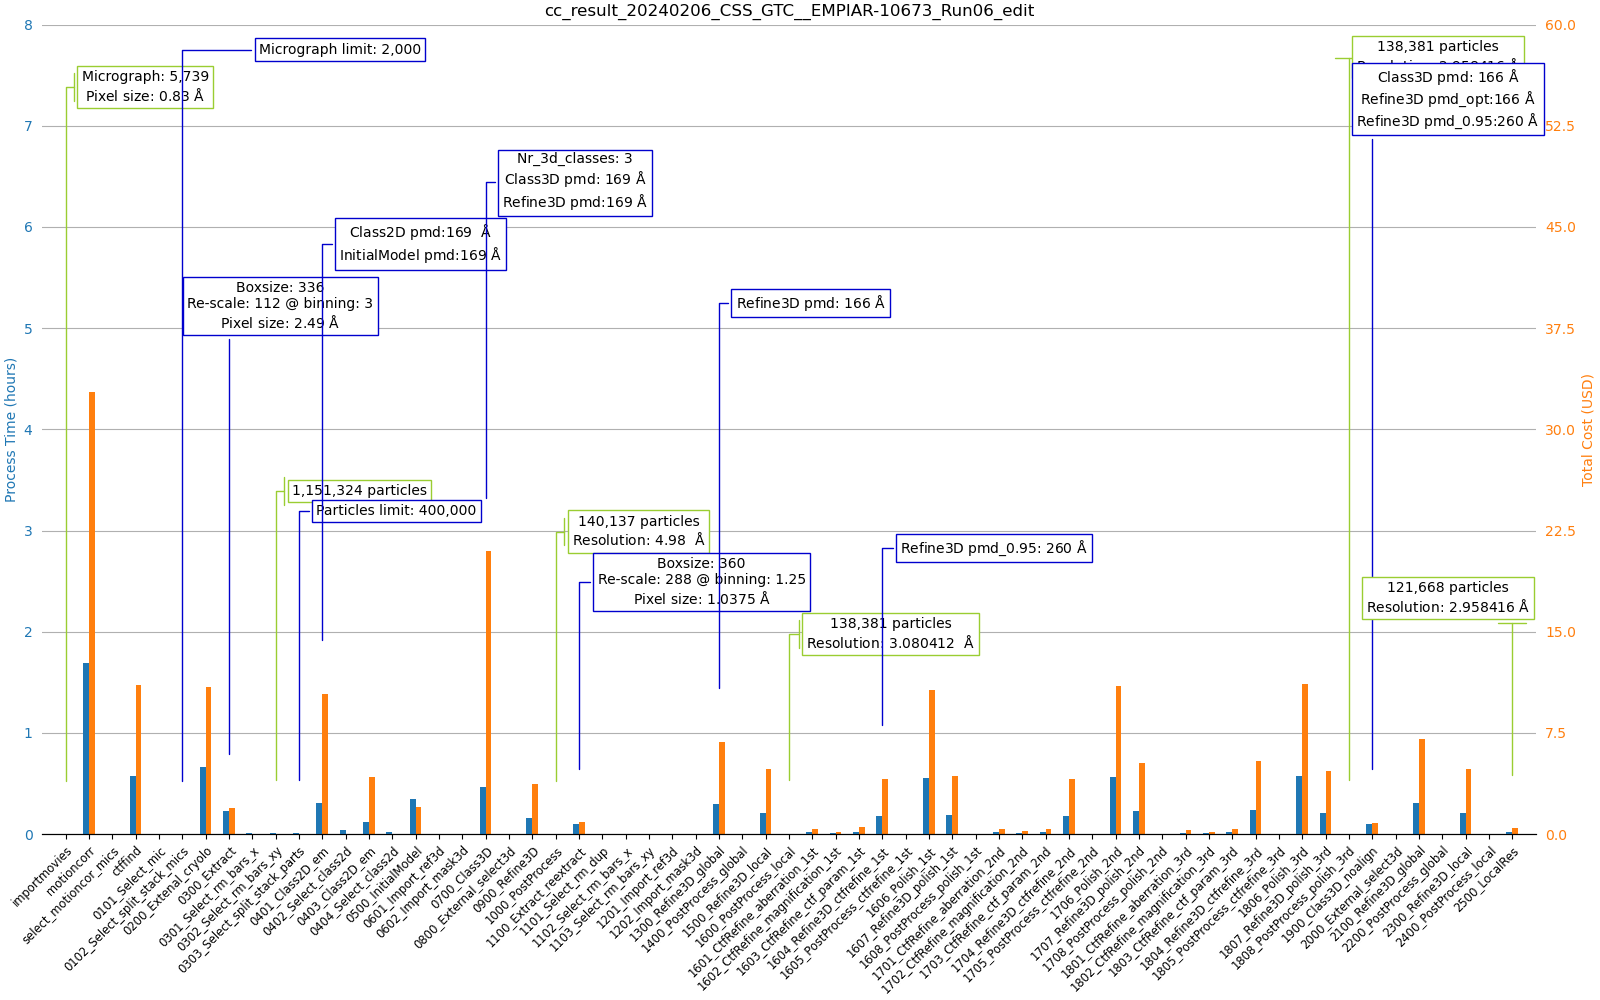

In [4]:
from pathlib import Path
import numpy as np

%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
from matplotlib.patches import ConnectionStyle

import starfile

import warnings
warnings.simplefilter('ignore', FutureWarning)
# supress FutureWarning(s) in starfile
# /efs/em/pyenv/versions/anaconda3-2023.03/envs/schemes-editing-py3.12/lib/python3.12/site-packages/starfile/parser.py:106: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
#   df = pd.read_csv(



num_jobs = df['Job Name'].count() # the number of bars 
x = np.arange(num_jobs)  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16,10), layout='constrained')
ax_right = ax.twinx()

rects = ax.bar(x-width/2, df['Running time(hours)'][:num_jobs], width, label=df['Job Name'][:num_jobs], color="C0")
rects_right = ax_right.bar(x+width/2, df['Cost(RunnningTime,USD)'][:num_jobs], width, label=df['Job Name'][:num_jobs], color="C1")

ax.set_xticks(x, df['Job Name'][:num_jobs], rotation=45, rotation_mode='anchor', ha='right', size="small")
ax.set_ylabel('Process Time (hours)', color="C0")
ax_right.set_ylabel('Total Cost (USD)', color="C1")


if ylimtime is not None:
    ax.set_ylim(0, ylimtime)
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
ax.tick_params(left=False, axis="y", labelcolor='C0', which='both')


if ylimcost is not None:
    ax_right.set_ylim(0, ylimcost)
ax_right.set_yticks(np.linspace(ax_right.get_yticks()[0], ax_right.get_yticks()[-1], len(ax.get_yticks())))
ax_right.tick_params(right=False, axis="y", labelcolor='C1', which='both')

ax_right.grid(axis="y")
ax_right.set_axisbelow(True)

ax.set_xlim(-1, max(x)+1)
ax.spines[['top', 'left', 'right']].set_visible(False)
ax_right.spines[['top', 'left', 'right']].set_visible(False)
ax.set_title(Path(csvpath).stem)


# annotate
annots = []
axtickinterval = ax.get_yticks()[1]-ax.get_yticks()[0]
tickratio = (ax_right.get_yticks()[1]-ax_right.get_yticks()[0])/(axtickinterval)
total_num_annots = 15

barindex = df['Job Name'][:num_jobs].str.endswith('importmovies').idxmax()
df_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/movies.star")
ann = ax.annotate(f"Micrograph: {df_star['movies'].shape[0]:,}\n"
                  +f"Pixel size: {df_star['optics']['rlnMicrographOriginalPixelSize'][0]}"+r" $\mathrm{\AA}$",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="yellowgreen"),
                  arrowprops=dict(arrowstyle=ArrowStyle('|-|', widthA=1.0, widthB=0.),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="yellowgreen"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_Select_split_stack_mics').idxmax()
df_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/job.star")
ann = ax.annotate(f"Micrograph limit: {int(df_star['joboptions_values'][df_star['joboptions_values']['rlnJobOptionVariable']=='split_size']['rlnJobOptionValue'].item()):,}",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="mediumblue"),
                  arrowprops=dict(arrowstyle=ArrowStyle('-'),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="mediumblue"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_Extract').idxmax()
df_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/job.star")
df_particles_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/particles.star")
ann = ax.annotate(f"Boxsize: {(boxsize:=df_star['joboptions_values'][df_star['joboptions_values']['rlnJobOptionVariable']=='extract_size']['rlnJobOptionValue'].item())}\n"
                  +f"Re-scale: {(rescale:=df_star['joboptions_values'][df_star['joboptions_values']['rlnJobOptionVariable']=='rescale']['rlnJobOptionValue'].item())} @ binning: {int(binning) if (binning:=float(boxsize)/float(rescale)).is_integer() else binning}\n"
                  +f"Pixel size: {df_particles_star['optics']['rlnImagePixelSize'].item()}"+r" $\mathrm{\AA}$",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="mediumblue"),
                  arrowprops=dict(arrowstyle=ArrowStyle('-'),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="mediumblue"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_Select_rm_bars_xy').idxmax()
df_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/particles.star")
ann = ax.annotate(f"{df_star['particles'].shape[0]:,} particles",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="yellowgreen"),
                  arrowprops=dict(arrowstyle=ArrowStyle('|-|', widthA=1.0, widthB=0.),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="yellowgreen"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_Select_split_stack_parts').idxmax()
df_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/job.star")
ann = ax.annotate(f"Particles limit: {int(df_star['joboptions_values'][df_star['joboptions_values']['rlnJobOptionVariable']=='split_size']['rlnJobOptionValue'].item()):,}",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="mediumblue"),
                  arrowprops=dict(arrowstyle=ArrowStyle('-'),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="mediumblue"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_Class2D_em').idxmax()
df_class2d_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/job.star")
df_initialmodel_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][df['Job Name'][:num_jobs].str.endswith('_InitialModel').idxmax()]}/job.star")
ann = ax.annotate(f"Class2D pmd:{df_class2d_star['joboptions_values'][df_class2d_star['joboptions_values']['rlnJobOptionVariable']=='particle_diameter']['rlnJobOptionValue'].item()} "+r" $\mathrm{\AA}$"+"\n"
                  +f"InitialModel pmd:{df_initialmodel_star['joboptions_values'][df_initialmodel_star['joboptions_values']['rlnJobOptionVariable']=='particle_diameter']['rlnJobOptionValue'].item()}"+r" $\mathrm{\AA}$",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="mediumblue"),
                  arrowprops=dict(arrowstyle=ArrowStyle('-'),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="mediumblue"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_Class3D').idxmax()
df_class3d_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/job.star")
df_refine3d_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][df['Job Name'][:num_jobs].str.endswith('_Refine3D').idxmax()]}/job.star")
ann = ax.annotate(f"Nr_3d_classes: {df_class3d_star['joboptions_values'][df_class3d_star['joboptions_values']['rlnJobOptionVariable']=='nr_classes']['rlnJobOptionValue'].item()}\n"
                  +f"Class3D pmd: {df_class3d_star['joboptions_values'][df_class3d_star['joboptions_values']['rlnJobOptionVariable']=='particle_diameter']['rlnJobOptionValue'].item()}"+r" $\mathrm{\AA}$"+"\n"
                  +f"Refine3D pmd:{df_refine3d_star['joboptions_values'][df_refine3d_star['joboptions_values']['rlnJobOptionVariable']=='particle_diameter']['rlnJobOptionValue'].item()}"+r" $\mathrm{\AA}$",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="mediumblue"),
                  arrowprops=dict(arrowstyle=ArrowStyle('-'),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="mediumblue"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_PostProcess').idxmax()
df_rundata_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][df['Job Name'][:num_jobs].str.endswith('_Refine3D').idxmax()]}/run_data.star")
df_postprocess_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/postprocess.star")
ann = ax.annotate(f"{df_rundata_star['particles'].shape[0]:,} particles\n"
                  +f"Resolution: {df_postprocess_star['general']['rlnFinalResolution']} "+r" $\mathrm{\AA}$",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="yellowgreen"),
                  arrowprops=dict(arrowstyle=ArrowStyle('|-|', widthA=1.0, widthB=0.),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="yellowgreen"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_Extract_reextract').idxmax()
df_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/job.star")
df_particles_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/particles.star")
ann = ax.annotate(f"Boxsize: {(boxsize:=df_star['joboptions_values'][df_star['joboptions_values']['rlnJobOptionVariable']=='extract_size']['rlnJobOptionValue'].item())}\n"
                  +f"Re-scale: {(rescale:=df_star['joboptions_values'][df_star['joboptions_values']['rlnJobOptionVariable']=='rescale']['rlnJobOptionValue'].item())} @ binning: {int(binning) if (binning:=float(boxsize)/float(rescale)).is_integer() else binning}\n"
                  +f"Pixel size: {df_particles_star['optics']['rlnImagePixelSize'].item()}"+r" $\mathrm{\AA}$",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="mediumblue"),
                  arrowprops=dict(arrowstyle=ArrowStyle('-'),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="mediumblue"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_Refine3D_global').idxmax()
df_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/job.star")
ann = ax.annotate(f"Refine3D pmd: {df_star['joboptions_values'][df_star['joboptions_values']['rlnJobOptionVariable']=='particle_diameter']['rlnJobOptionValue'].item()}"+r" $\mathrm{\AA}$",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="mediumblue"),
                  arrowprops=dict(arrowstyle=ArrowStyle('-'),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="mediumblue"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_PostProcess_local').idxmax()
df_rundata_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][df['Job Name'][:num_jobs].str.endswith('_Refine3D_local').idxmax()]}/run_data.star")
df_postprocess_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][df['Job Name'][:num_jobs].str.endswith('_PostProcess_local').idxmax()]}/postprocess.star")
ann = ax.annotate(f"{df_rundata_star['particles'].shape[0]:,} particles\n"
                  +f"Resolution: {df_postprocess_star['general']['rlnFinalResolution']} "+r" $\mathrm{\AA}$",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="yellowgreen"),
                  arrowprops=dict(arrowstyle=ArrowStyle('|-|', widthA=1.0, widthB=0.),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="yellowgreen"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_Refine3D_ctfrefine_1st').idxmax()
df_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/job.star")
ann = ax.annotate(f"Refine3D pmd_0.95: {df_star['joboptions_values'][df_star['joboptions_values']['rlnJobOptionVariable']=='particle_diameter']['rlnJobOptionValue'].item()}"+r" $\mathrm{\AA}$",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="mediumblue"),
                  arrowprops=dict(arrowstyle=ArrowStyle('-'),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="mediumblue"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_PostProcess_polish_3rd').idxmax()
df_rundata_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][df['Job Name'][:num_jobs].str.endswith('_Refine3D_polish_3rd').idxmax()]}/run_data.star")
df_postprocess_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/postprocess.star")
ann = ax.annotate(f"{df_rundata_star['particles'].shape[0]:,} particles\nResolution: {df_postprocess_star['general']['rlnFinalResolution']}"+r" $\mathrm{\AA}$",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data', 
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="yellowgreen"),
                  arrowprops=dict(arrowstyle=ArrowStyle('|-|', widthA=1.0, widthB=0.),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="yellowgreen"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_Class3D_noalign').idxmax()
df_class3dnoalign_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][barindex]}/job.star")
df_2100refine3dglobal_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][df['Job Name'][:num_jobs].str.endswith('2100_Refine3D_global').idxmax()]}/job.star")
df_2300refine3dlocal_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][df['Job Name'][:num_jobs].str.endswith('2300_Refine3D_local').idxmax()]}/job.star")
ann = ax.annotate(f"Class3D pmd: {df_class3dnoalign_star['joboptions_values'][df_class3dnoalign_star['joboptions_values']['rlnJobOptionVariable']=='particle_diameter']['rlnJobOptionValue'].item()}"+r" $\mathrm{\AA}$"+"\n"
                  +f"Refine3D pmd_opt:{df_2100refine3dglobal_star['joboptions_values'][df_2100refine3dglobal_star['joboptions_values']['rlnJobOptionVariable']=='particle_diameter']['rlnJobOptionValue'].item()}"+r" $\mathrm{\AA}$"+"\n"
                  +f"Refine3D pmd_0.95:{df_2300refine3dlocal_star['joboptions_values'][df_2300refine3dlocal_star['joboptions_values']['rlnJobOptionVariable']=='particle_diameter']['rlnJobOptionValue'].item()}"+r" $\mathrm{\AA}$",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="mediumblue"),
                  arrowprops=dict(arrowstyle=ArrowStyle('-'),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="mediumblue"))
annots.append(ann)
ann.draggable()

barindex = df['Job Name'][:num_jobs].str.endswith('_LocalRes').idxmax()
df_2300refine3dlocal_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][df['Job Name'][:num_jobs].str.endswith('2300_Refine3D_local').idxmax()]}/run_data.star")
df_2400postprocess_star = starfile.read(Path(csvpath).parent / f"{df['JobType/JobID'][df['Job Name'][:num_jobs].str.endswith('2400_PostProcess_local').idxmax()]}/postprocess.star")
ann = ax.annotate(f"{df_2300refine3dlocal_star['particles'].shape[0]:,} particles\n"
                  +f"Resolution: {df_2400postprocess_star['general']['rlnFinalResolution']}"+r" $\mathrm{\AA}$",
                  xy=(barindex, axtickinterval/2 + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio))), xycoords='data',
                  xytext=(0.5+barindex, axtickinterval + max((rects[barindex].get_height(), rects_right[barindex].get_height()/tickratio) + (total_num_annots-len(annots))*axtickinterval/5)), textcoords='data',
                  size=10, va="center_baseline", ha="left",
                  bbox=dict(boxstyle="square", fc="w", ec="yellowgreen"),
                  arrowprops=dict(arrowstyle=ArrowStyle('|-|', widthA=1.0, widthB=0.),
                              connectionstyle=ConnectionStyle("angle", angleA=0, angleB=90),
                              relpos=(0.0, 0.5),
                              ec="yellowgreen"))
annots.append(ann)
ann.draggable()

from matplotlib.text import Text
from matplotlib.transforms import Bbox
import types

def get_window_extent_ignoring_arrow_patch(self, renderer=None):
    # docstring inherited
    # This block is the same as in Text.get_window_extent, but we need to
    # set the renderer before calling update_positions().
    if not self.get_visible() or not self._check_xy(renderer):
        return Bbox.unit()
    if renderer is not None:
        self._renderer = renderer
    if self._renderer is None:
        self._renderer = self.figure._get_renderer()
    if self._renderer is None:
        raise RuntimeError('Cannot get window extent without renderer')

    self.update_positions(self._renderer)

    text_bbox = Text.get_window_extent(self)
    bboxes = [text_bbox]

    # if self.arrow_patch is not None:
    #     bboxes.append(self.arrow_patch.get_window_extent())

    return Bbox.union(bboxes)

for annot in annots:
    annot.get_window_extent_ignoring_arrow_patch = types.MethodType(get_window_extent_ignoring_arrow_patch, annot)


# adjust_text_ignoring_arrow_patch(annots, objects=rects.patches+rects_right.patches, only_move='y+', ax=ax, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5), max_move=None)
adjust_text_ignoring_arrow_patch(annots, objects=rects.patches+rects_right.patches, only_move='y+', ax=ax,  max_move=None)

ax_right.set_zorder(1)
ax.set_zorder(2)
ax.patch.set_alpha(0)


In [5]:
plt.savefig(f'{outputsvg}', bbox_inches='tight')